In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale

In [2]:
df = pd.read_csv('datasets/diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


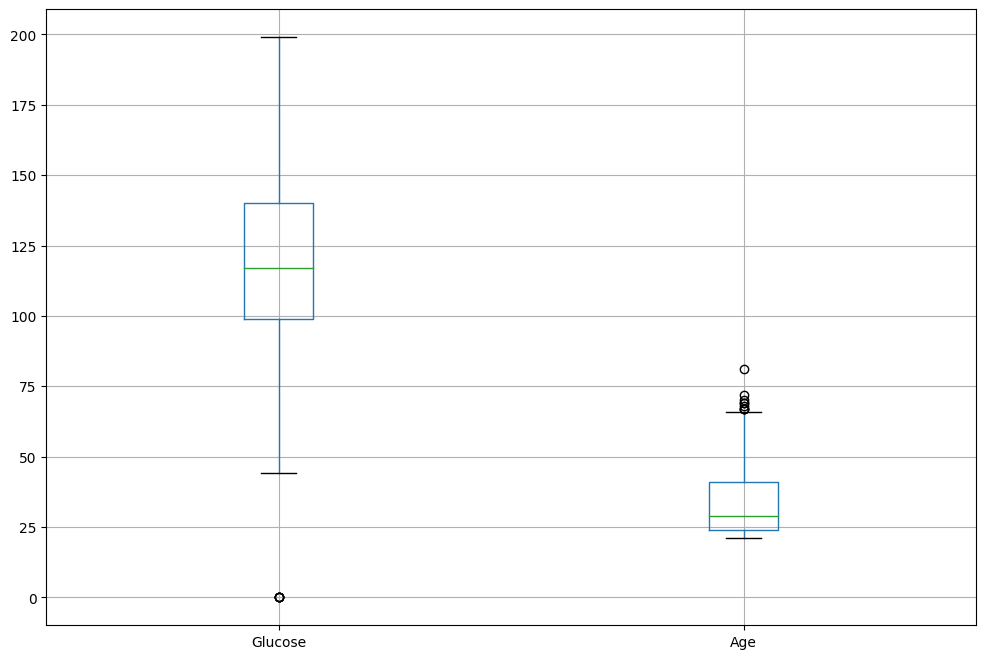

In [7]:
df.boxplot(column=['Glucose', 'Age'], figsize=(12,8))
plt.show()

In [8]:
outcome = df['Outcome']
df = df.drop('Outcome', axis=1)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


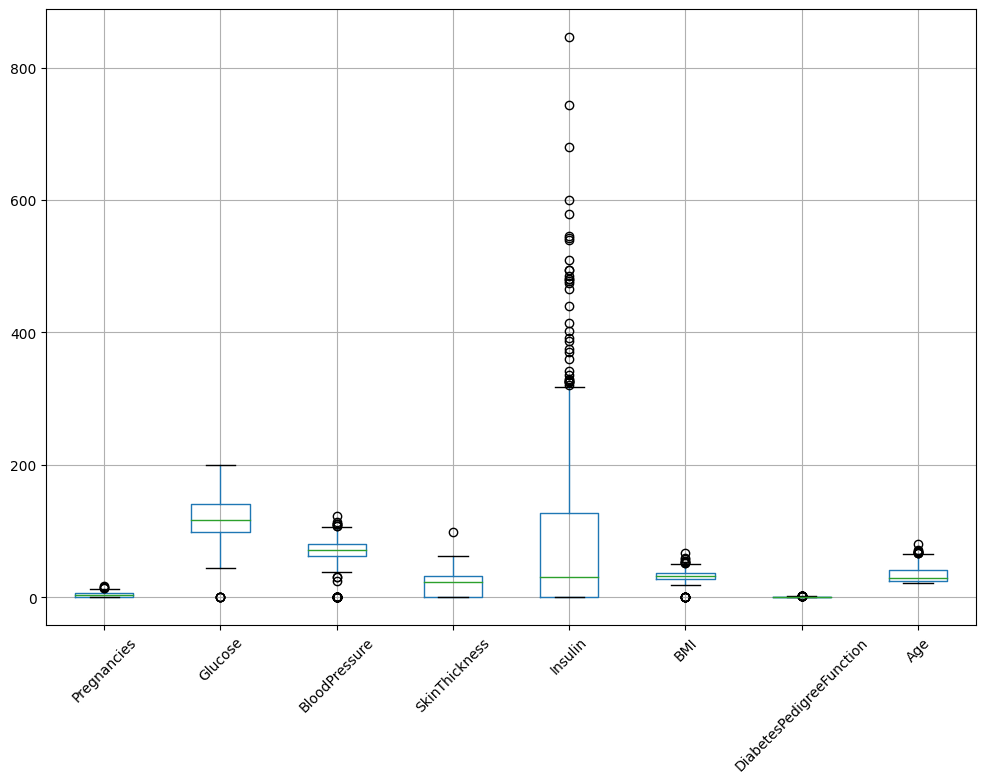

In [10]:
df.boxplot(figsize=(12,8), rot=45)
plt.show()

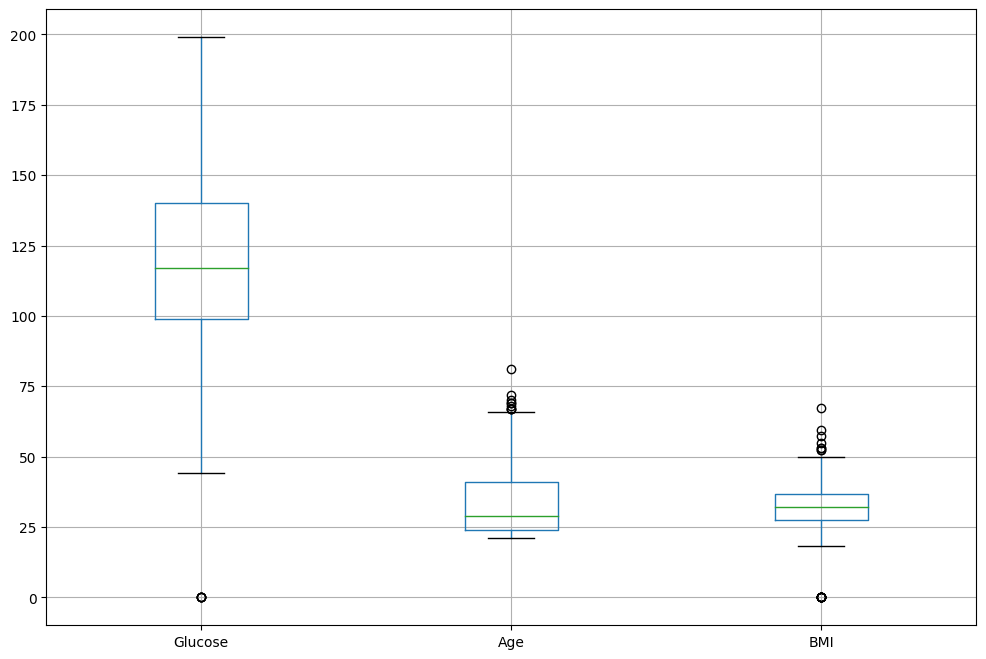

In [11]:
df.boxplot(column=['Glucose', 'Age', 'BMI'], figsize=(12,8))
plt.show()

In [13]:
df_scale = pd.DataFrame()

In [14]:
df_scale['Glucose'] = (df['Glucose'] - np.mean(df['Glucose'].values))/np.std(df['Glucose'].values)
df_scale['Age'] = (df['Age'] - np.mean(df['Age'].values))/np.std(df['Age'].values)
df_scale['BMI'] = (df['BMI'] - np.mean(df['BMI'].values))/np.std(df['BMI'].values)

In [15]:
df_scale.describe()

,Glucose,Age,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.251859e-18,1.931325e-16,2.590520e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-1.041549e+00,-4.060474e+00
25%,-6.852363e-01,-7.862862e-01,-5.955785e-01
50%,-1.218877e-01,-3.608474e-01,9.419788e-04
75%,6.057709e-01,6.602056e-01,5.847705e-01
max,2.444478e+00,4.063716e+00,4.455807e+00


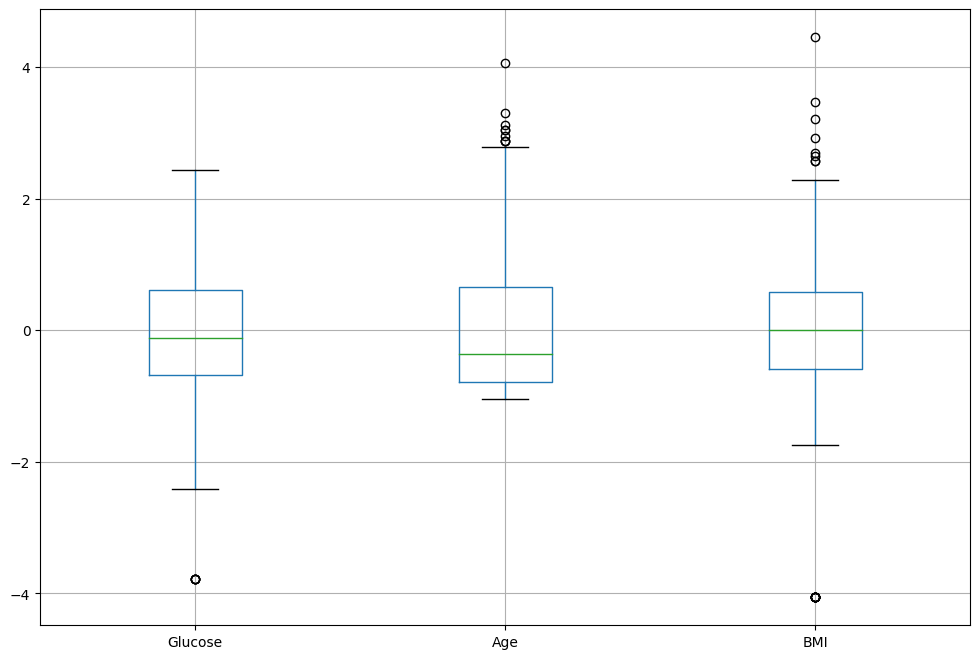

In [16]:
df_scale.boxplot(column=['Glucose', 'Age', 'BMI'], figsize=(12,8))
plt.show()

In [17]:
scaled_df = pd.DataFrame()
scaled_df['Glucose'] = scale(df['Glucose'])
scaled_df['BMI'] = scale(df['BMI'])
scaled_df['Age'] = scale(df['Age'])

In [18]:
scaled_df.describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.251859e-18,2.590520e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


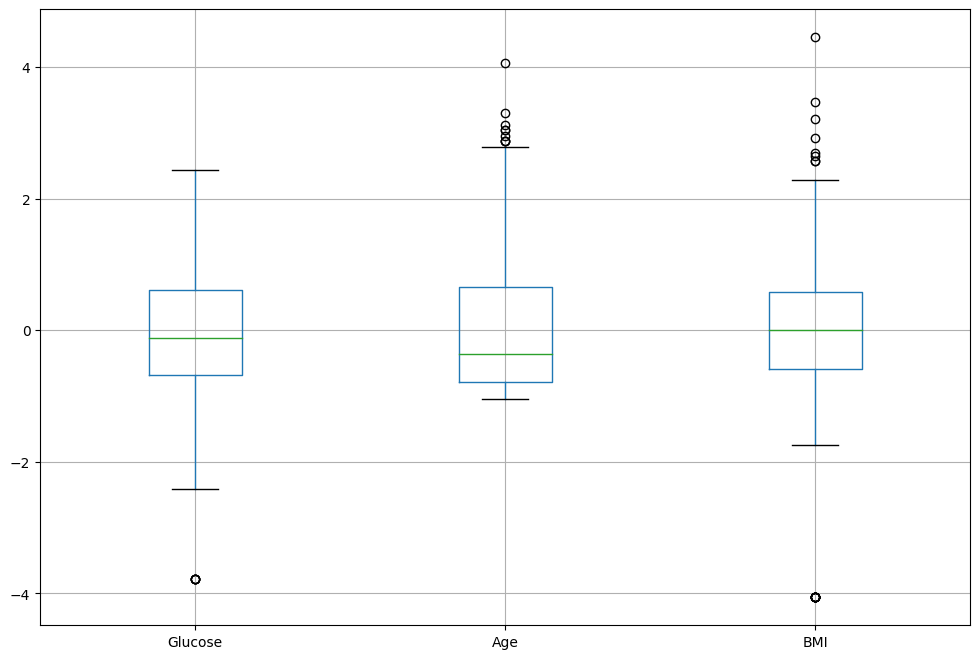

In [19]:
scaled_df.boxplot(column=['Glucose', 'Age', 'BMI'], figsize=(12,8))
plt.show()

In [20]:
std_scaler = StandardScaler(copy=True,with_mean=True,with_std=True)

In [21]:
scaled_array = std_scaler.fit_transform(df)

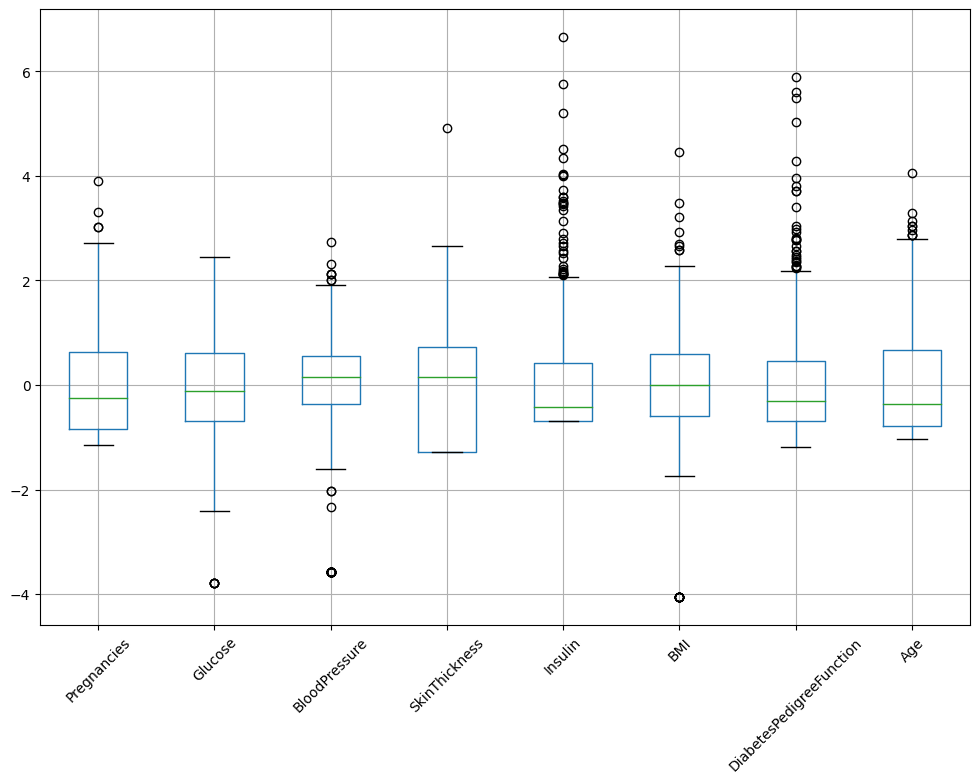

In [22]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)
scaled_df.boxplot(figsize=(12,8), rot=45)
plt.show()

In [23]:
std_scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [24]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [25]:
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [26]:
std_scaler.n_samples_seen_

768

In [27]:
scaled_df['Outcome'] = outcome

In [28]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [35]:
scaled_df.to_csv('datasets/diabetes_processed.csv',index=False)

In [36]:
!ls datasets/

auto-mpg.csv		driver-data.csv		 mnist-digit-train.csv
auto-mpg-processed.csv	exams.csv		 titanic_test.csv
Dataset_spine.csv	fashion-mnist_test.csv	 titanic_train.csv
diabetes.csv		fashion-mnist_train.csv  titanic_train_processed.csv
diabetes_processed.csv	housing.csv
diet_data.csv		Lego


In [33]:
!rm -f datasets/diabetes_processes.csv 

In [37]:
from sklearn.preprocessing import RobustScaler, robust_scale

In [38]:
robust_df = pd.DataFrame(robust_scale(df),
                         columns=df.columns)

In [42]:
robust_df[['Glucose','Age','BMI']].describe()

,Glucose,Age,BMI
count,768.000000,768.000000,768.000000
mean,0.094413,0.249464,-0.000798
std,0.775094,0.691778,0.847759
min,-2.836364,-0.470588,-3.440860
25%,-0.436364,-0.294118,-0.505376
50%,0.000000,0.000000,0.000000
75%,0.563636,0.705882,0.494624
max,1.987879,3.058824,3.774194


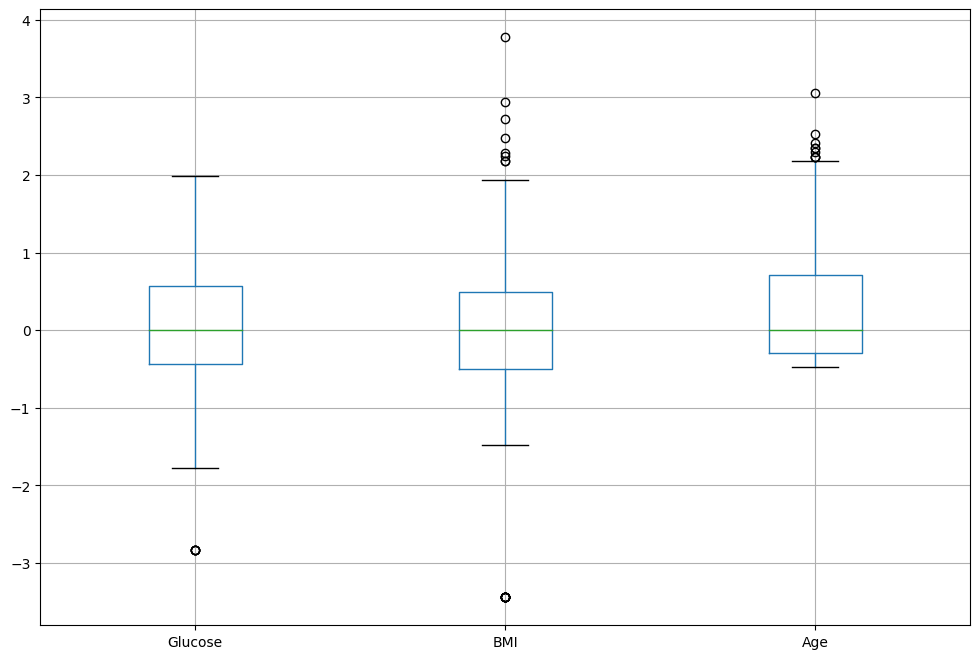

In [43]:
robust_df.boxplot(column=['Glucose','BMI','Age'],figsize=(12,8))
plt.show()

In [44]:
robust_scaler = RobustScaler(copy=True,with_centering=True,with_scaling=True)
robust_scaler

RobustScaler()

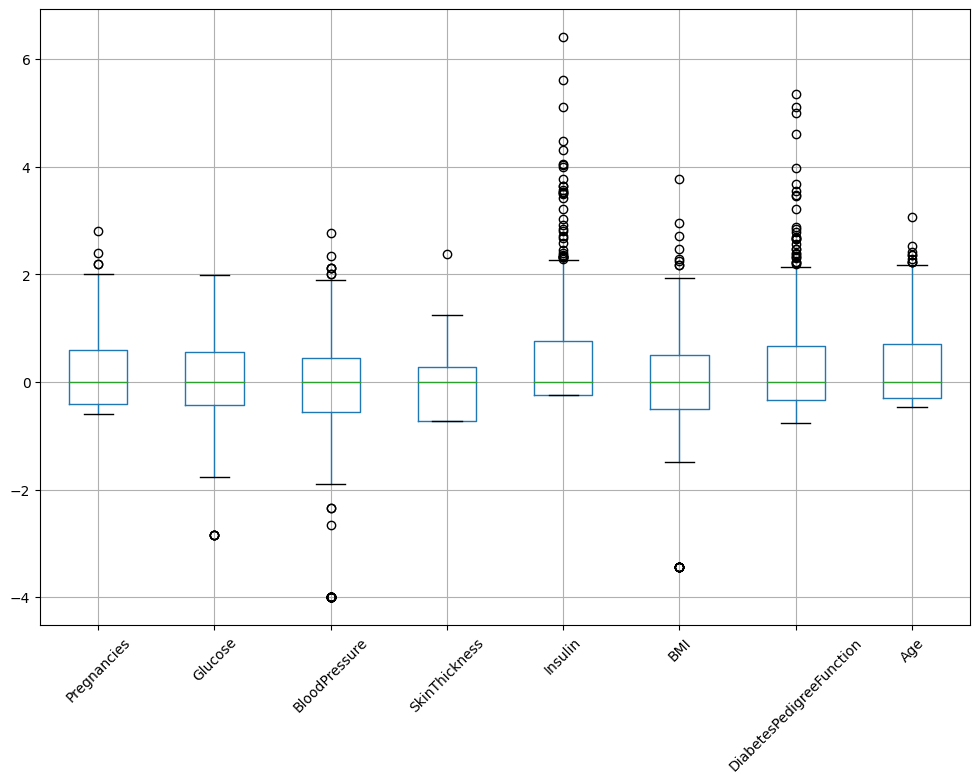

In [45]:
robust_scale_array = robust_scaler.fit_transform(df)
robust_scale_df = pd.DataFrame(robust_scale_array, columns=df.columns)
robust_scale_df.boxplot(figsize=(12,8), rot=45)
plt.show()